In [23]:
# 1. 导入依赖
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

# 让图像内嵌在 notebook 里显示
%matplotlib inline

In [24]:
# 2. 读取月度特征数据
monthly_path = "data/sh000016_monthly_features.csv"  # 如果路径不同，在这里改
df_month = pd.read_csv(monthly_path)


df_month["month"] = pd.to_datetime(df_month["month"])
df_month["month"] = df_month["month"].dt.to_period("M").dt.to_timestamp()
df_month.head()

,month,close_month_end,ret_month,vol_month_sum,vol_month_chg,vol_20_annual_month_end,vol_60_annual_month_end,month_str
0,2015-01-01,2405.38,-0.068249,240759567500,-0.372974,0.467613,0.425187,2015-01
1,2015-02-01,2474.59,0.028773,113685256600,-0.527806,0.256287,0.432385,2015-02
2,2015-03-01,2754.66,0.113178,257993309000,1.269365,0.253355,0.347897,2015-03
3,2015-04-01,3250.49,0.179997,368238254400,0.427317,0.269143,0.270690,2015-04
4,2015-05-01,3111.33,-0.042812,259537919800,-0.295190,0.391430,0.314535,2015-05


In [25]:
# 3. 处理日期列并设为索引
date_col = "month"   # 如果你的列叫 'month' 就改成 "month"
df_month[date_col] = pd.to_datetime(df_month[date_col])
df_month = df_month.sort_values(date_col).set_index(date_col)

df_month.head()


,close_month_end,ret_month,vol_month_sum,vol_month_chg,vol_20_annual_month_end,vol_60_annual_month_end,month_str
month,,,,,,,
2015-01-01,2405.38,-0.068249,240759567500,-0.372974,0.467613,0.425187,2015-01
2015-02-01,2474.59,0.028773,113685256600,-0.527806,0.256287,0.432385,2015-02
2015-03-01,2754.66,0.113178,257993309000,1.269365,0.253355,0.347897,2015-03
2015-04-01,3250.49,0.179997,368238254400,0.427317,0.269143,0.270690,2015-04
2015-05-01,3111.33,-0.042812,259537919800,-0.295190,0.391430,0.314535,2015-05


In [26]:
# 3. 指定用于 Regime 聚类的特征列
feature_cols = [
    "ret_month",
    "vol_month_sum",
    "vol_20_annual_month_end"
]

# 检查列是否存在
missing = [c for c in feature_cols if c not in df_month.columns]
if missing:
    print("缺失列：", missing)
else:
    print("聚类特征列：", feature_cols)

# 4. 取出特征矩阵并标准化
X_raw = df_month[feature_cols].copy().dropna()
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

X.shape


聚类特征列： ['ret_month', 'vol_month_sum', 'vol_20_annual_month_end']


(120, 3)

d:\university\c\anaconda\anaconda\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\university\c\anaconda\anaconda\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\university\c\anaconda\anaconda\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\university\c\anaconda\anaconda\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36873 (\N{CJK UNIFIED IDEOGRAPH-9009}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\university\c\anaconda\anaconda\envs\test\lib\site-packages\IPython\core\pylabtools.py

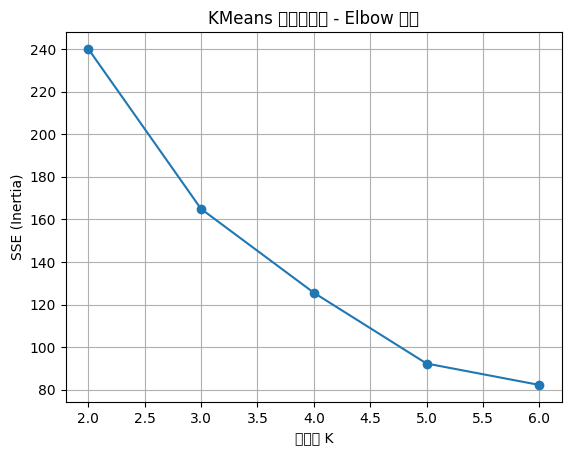

In [27]:
# 5. Elbow 曲线 (SSE)
sse = []
K_range = range(2, 7)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X)
    sse.append(km.inertia_)

plt.figure()
plt.plot(list(K_range), sse, marker="o")
plt.xlabel("聚类数 K")
plt.ylabel("SSE (Inertia)")
plt.title("KMeans 聚类数选择 - Elbow 曲线")
plt.grid(True)
plt.show()


d:\university\c\anaconda\anaconda\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36718 (\N{CJK UNIFIED IDEOGRAPH-8F6E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\university\c\anaconda\anaconda\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24275 (\N{CJK UNIFIED IDEOGRAPH-5ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\university\c\anaconda\anaconda\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\university\c\anaconda\anaconda\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\university\c\anaconda\anaconda\envs\test\lib\site-packages\IPython\core\pylabtools.py

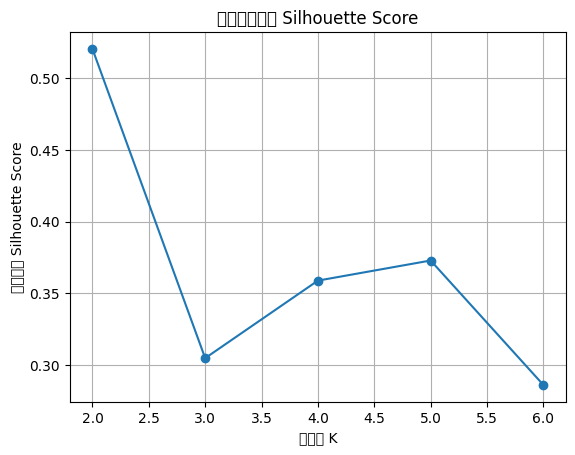

[(2, 0.5203540742408097),
 (3, 0.304812888705872),
 (4, 0.3588605817272719),
 (5, 0.3728757902352798),
 (6, 0.2861553907304862)]

In [28]:
# 6. Silhouette Score
sil_scores = []
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)

plt.figure()
plt.plot(list(K_range), sil_scores, marker="o")
plt.xlabel("聚类数 K")
plt.ylabel("轮廓系数 Silhouette Score")
plt.title("不同聚类数的 Silhouette Score")
plt.grid(True)
plt.show()

list(zip(K_range, sil_scores))


In [29]:
# 7. KMeans 聚类
K = 3  # 如果你觉得 4 更好，就改成 4
kmeans = KMeans(n_clusters=K, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(X)

df_cluster = df_month.loc[X_raw.index].copy()
df_cluster["cluster"] = cluster_labels

df_cluster.head()


,close_month_end,ret_month,vol_month_sum,vol_month_chg,vol_20_annual_month_end,vol_60_annual_month_end,month_str,cluster
month,,,,,,,,
2015-01-01,2405.38,-0.068249,240759567500,-0.372974,0.467613,0.425187,2015-01,2
2015-02-01,2474.59,0.028773,113685256600,-0.527806,0.256287,0.432385,2015-02,0
2015-03-01,2754.66,0.113178,257993309000,1.269365,0.253355,0.347897,2015-03,2
2015-04-01,3250.49,0.179997,368238254400,0.427317,0.269143,0.270690,2015-04,2
2015-05-01,3111.33,-0.042812,259537919800,-0.295190,0.391430,0.314535,2015-05,2


In [30]:
# 8. 不同 cluster 的特征均值（很重要）
cluster_profile = df_cluster.groupby("cluster")[feature_cols].mean()
cluster_profile


,ret_month,vol_month_sum,vol_20_annual_month_end
cluster,,,
0,0.052686,7.565731e+10,0.175145
1,-0.030444,6.459630e+10,0.178653
2,-0.019967,2.975105e+11,0.453852


In [31]:
# 9. 根据 cluster_profile 的结果手动映射 Regime 名称
cluster_to_regime = {
    0: "Regime_Bull",      # 比如 0 类：上涨+低波动
    1: "Regime_Bear",      # 比如 1 类：下跌+高波动
    2: "Regime_Sideways",  # 比如 2 类：震荡
}

df_cluster["regime"] = df_cluster["cluster"].map(cluster_to_regime)

df_cluster[["cluster", "regime"]].head()


,cluster,regime
month,,
2015-01-01,2,Regime_Sideways
2015-02-01,0,Regime_Bull
2015-03-01,2,Regime_Sideways
2015-04-01,2,Regime_Sideways
2015-05-01,2,Regime_Sideways


C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 22343 (\N{CJK UNIFIE

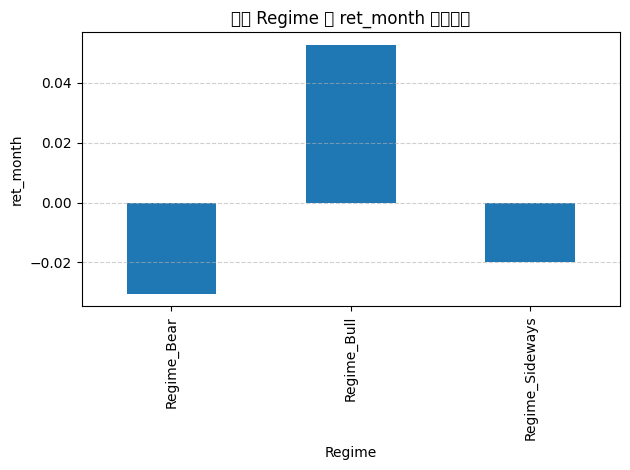

C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 22343 (\N{CJK UNIFIE

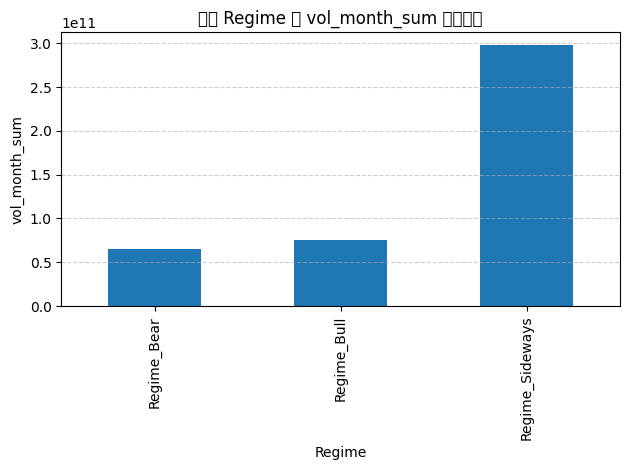

C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2730413094.py:11: UserWarning: Glyph 22343 (\N{CJK UNIFIE

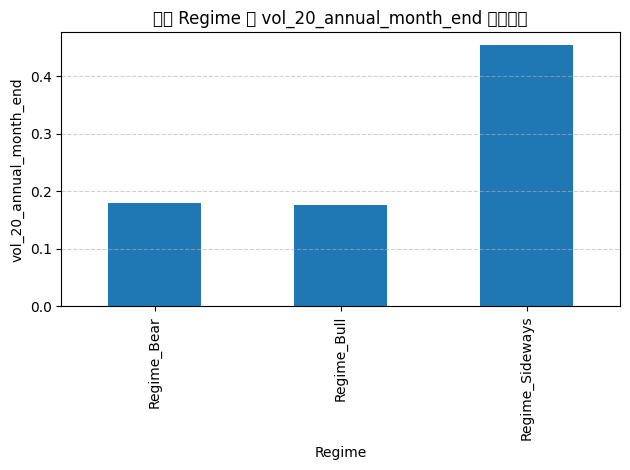

In [32]:
# 10. Regime 画像（每个特征一个柱状图）
regime_profile = df_cluster.groupby("regime")[feature_cols].mean()

for col in feature_cols:
    plt.figure()
    regime_profile[col].plot(kind="bar")
    plt.title(f"不同 Regime 下 {col} 的平均值")
    plt.xlabel("Regime")
    plt.ylabel(col)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2043371869.py:13: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2043371869.py:13: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2043371869.py:13: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2043371869.py:13: UserWarning: Glyph 35777 (\N{CJK UNIFIED IDEOGRAPH-8BC1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2043371869.py:13: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2043371869.py:13: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\zhou\AppData\Local\Temp\ipykernel_7596\2043371869.py:13: UserWarning: Glyph 25910 (\N{CJK UNIFIE

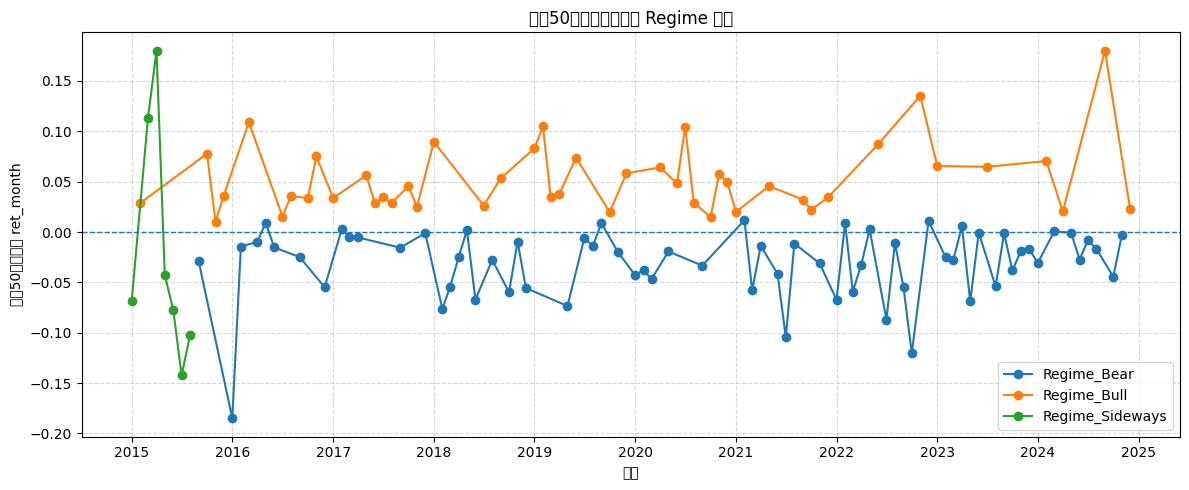

In [33]:
# 11. 在时间轴上按 Regime 着色显示月度收益
plt.figure(figsize=(12, 5))

for regime_name, sub_df in df_cluster.groupby("regime"):
    plt.plot(sub_df.index, sub_df["ret_month"], marker="o", linestyle="-", label=regime_name)

plt.axhline(0, linestyle="--", linewidth=1)
plt.xlabel("时间")
plt.ylabel("上证50月度收益 ret_month")
plt.title("上证50月度收益及市场 Regime 划分")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


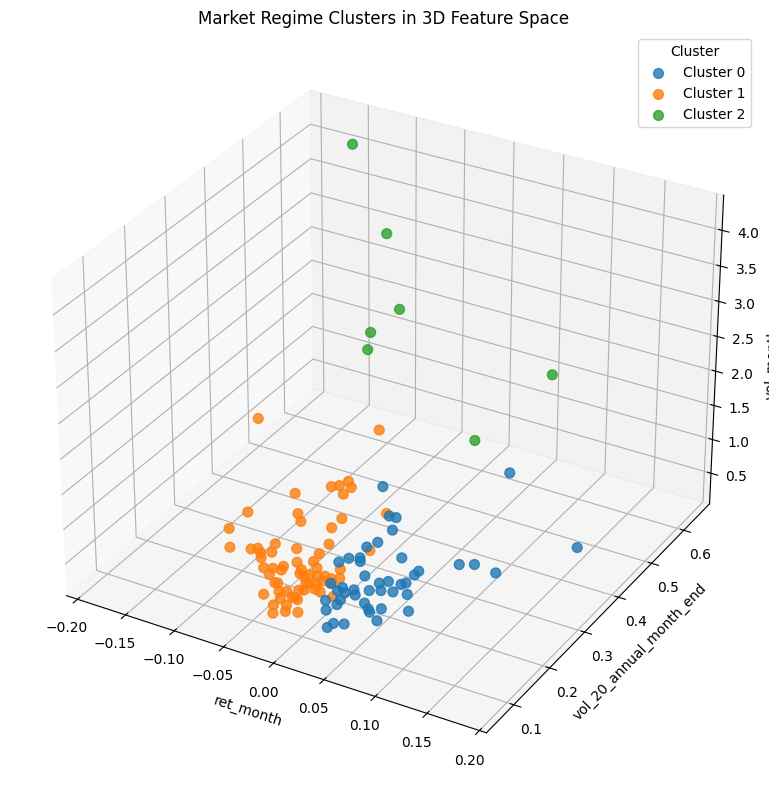

In [34]:
from mpl_toolkits.mplot3d import Axes3D  # 仅为激活 3D 支持
import matplotlib.pyplot as plt

# 选择要画的三个维度
x_col = "ret_month"
y_col = "vol_20_annual_month_end"
z_col = "vol_month_sum"

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

for c, sub in df_cluster.groupby("cluster"):
    ax.scatter(
        sub[x_col],
        sub[y_col],
        sub[z_col],
        s=50,
        label=f"Cluster {c}",
        alpha=0.8,
    )

ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title("Market Regime Clusters in 3D Feature Space")
ax.legend(title="Cluster")
plt.tight_layout()
plt.show()


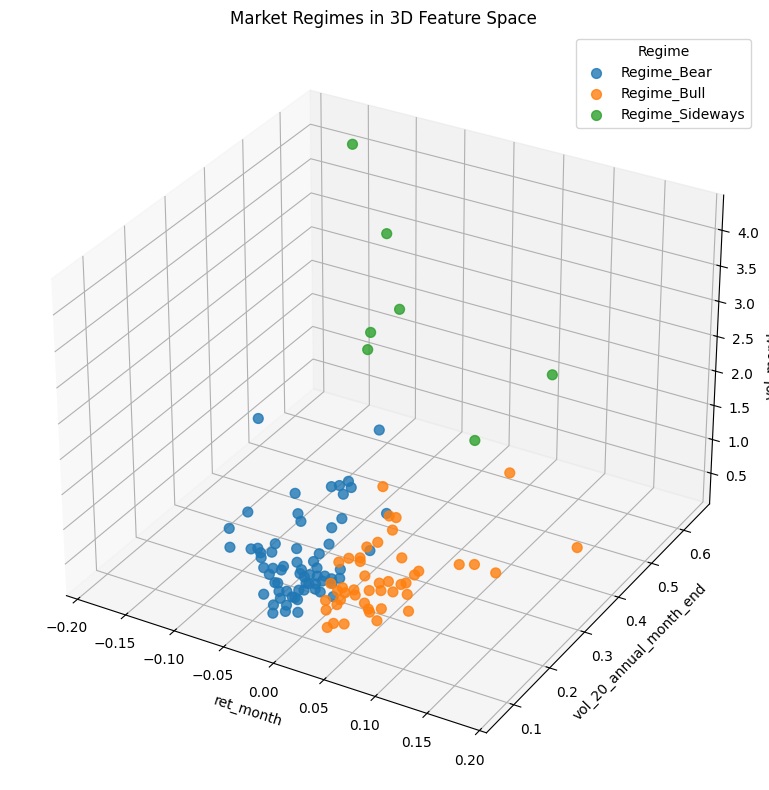

In [35]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

for r, sub in df_cluster.groupby("regime"):
    ax.scatter(
        sub[x_col],
        sub[y_col],
        sub[z_col],
        s=50,
        label=r,
        alpha=0.8,
    )

ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title("Market Regimes in 3D Feature Space")
ax.legend(title="Regime")
plt.tight_layout()
plt.show()


In [41]:
df_cluster.head()

,month,close_month_end,ret_month,vol_month_sum,vol_month_chg,vol_20_annual_month_end,vol_60_annual_month_end,month_str,cluster,regime
0,2015-01-01,2405.38,-0.068249,240759567500,-0.372974,0.467613,0.425187,2015-01,2,Regime_Sideways
1,2015-02-01,2474.59,0.028773,113685256600,-0.527806,0.256287,0.432385,2015-02,0,Regime_Bull
2,2015-03-01,2754.66,0.113178,257993309000,1.269365,0.253355,0.347897,2015-03,2,Regime_Sideways
3,2015-04-01,3250.49,0.179997,368238254400,0.427317,0.269143,0.270690,2015-04,2,Regime_Sideways
4,2015-05-01,3111.33,-0.042812,259537919800,-0.295190,0.391430,0.314535,2015-05,2,Regime_Sideways


In [37]:
df_cluster.to_csv("data/cluster_info")

In [38]:
import pandas as pd

# 读取两个文件
df_factor = pd.read_csv("data/factor_longshort.csv")
df_cluster = pd.read_csv("data/cluster_info")

# 1. 处理日期格式
df_factor["日期"] = pd.to_datetime(df_factor["日期"])
df_cluster["month"] = pd.to_datetime(df_cluster["month"])

# 2. 为了 merge 统一字段名，把 df_factor 的“日期”重命名成 month
df_factor = df_factor.rename(columns={"日期": "month"})

# 3. 合并因子收益 + regime 信息
df_merged = pd.merge(
    df_factor,
    df_cluster[["month", "regime", "cluster"]],
    on="month",
    how="left"
)

# 4. 查看结果
df_merged.head(), df_merged.tail(), df_merged["regime"].value_counts()


(       month  MOM20  MOM120   RSI     PB    PE   DIV   ROE  PROFIT_GR   VOL  \
 0 2015-01-01   0.00    0.00  0.00   0.00  0.00  0.00  0.00       0.00  0.00   
 1 2015-02-01  -4.22   -4.22 -7.76  -4.65 -7.35 -4.72 -8.90       1.88  3.05   
 2 2015-03-01   1.84    1.84  3.44  -2.68 -4.02 -6.98 -0.27       9.71 -5.85   
 3 2015-04-01  -7.83   -7.83 -3.86   2.96 -5.44 -2.13 -9.53      -7.40  8.35   
 4 2015-05-01  -9.61   -9.61 -2.20 -10.82 -8.75 -8.05 -1.88      -6.20 -1.89   
 
    BETA           regime  cluster  
 0  0.00  Regime_Sideways        2  
 1  2.06      Regime_Bull        0  
 2 -0.30  Regime_Sideways        2  
 3  1.45  Regime_Sideways        2  
 4  8.29  Regime_Sideways        2  ,
          month  MOM20  MOM120   RSI     PB     PE    DIV    ROE  PROFIT_GR  \
 115 2024-08-01  -2.42   -2.42 -0.85  -0.32   2.82   7.71   2.65      -3.12   
 116 2024-09-01  -5.67   -5.67  6.73 -10.52 -13.61  -8.65   0.66       0.34   
 117 2024-10-01   4.76    4.76  1.72  -1.96 -13.81 -12.00 

In [42]:
df_merged.head()

,month,MOM20,MOM120,RSI,PB,PE,DIV,ROE,PROFIT_GR,VOL,BETA,regime,cluster
0,2015-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Regime_Sideways,2
1,2015-02-01,-4.22,-4.22,-7.76,-4.65,-7.35,-4.72,-8.90,1.88,3.05,2.06,Regime_Bull,0
2,2015-03-01,1.84,1.84,3.44,-2.68,-4.02,-6.98,-0.27,9.71,-5.85,-0.30,Regime_Sideways,2
3,2015-04-01,-7.83,-7.83,-3.86,2.96,-5.44,-2.13,-9.53,-7.40,8.35,1.45,Regime_Sideways,2
4,2015-05-01,-9.61,-9.61,-2.20,-10.82,-8.75,-8.05,-1.88,-6.20,-1.89,8.29,Regime_Sideways,2


In [40]:
df_merged.to_csv("data/final_factor_longshort.csv")